In [1]:
# %load ../preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei')
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
pd.options.display.max_rows = 20

#import sklearn

#import itertools

In [2]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
index = pd.MultiIndex.from_product([['x'], boston['feature_names']], names=['variable', 'feature'])

In [4]:
df = pd.DataFrame(data=boston.data, columns=index)
df['y', 'HP'] = boston.target
df.head(5)

variable        x                                                           \
feature      CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0         0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1         0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2         0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3         0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4         0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

variable                           y  
feature  PTRATIO       B LSTAT    HP  
0           15.3  396.90  4.98  24.0  
1           17.8  396.90  9.14  21.6  
2           17.8  392.83  4.03  34.7  
3           18.7  394.63  2.94  33.4  
4           18.7  396.90  5.33  36.2

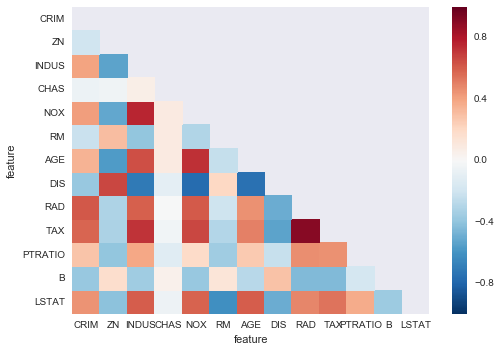

In [5]:
corr = df['x'].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

train = df.sample(frac=0.5, random_state=0, axis=0)
scaler.fit(train['x'])
train['x'] = scaler.transform(train['x'])
train.head(5)

variable         x                                                    \
feature       CRIM        ZN     INDUS      CHAS       NOX        RM   
329      -0.451575 -0.473673 -1.212970 -0.276759 -0.836792  0.105445   
371       0.687687 -0.473673  1.000468 -0.276759  0.641160 -0.068977   
219      -0.445732 -0.473673  0.373377  3.613247 -0.058923  0.165076   
403       2.623040 -0.473673  1.000468 -0.276759  1.177025 -1.361482   
78       -0.452915 -0.473673  0.215487 -0.276759 -1.035581 -0.045124   

variable                                                              \
feature        AGE       DIS       RAD       TAX   PTRATIO         B   
329      -1.847498  0.646145 -0.665092  0.080314 -0.699233  0.281003   
371       1.130895 -1.213608  1.627390  1.524268  0.834633  0.194239   
219       0.857516 -0.204914 -0.550467 -0.861928 -0.931637  0.458457   
403       0.987011 -0.968261  1.627390  1.524268  0.834633  0.488720   
78       -0.534559  0.553973 -0.550467 -0.115477  0.137421  0.388165   

variable               y  
feature      LSTAT    HP  
329      -0.794028  22.6  
371      -0.486418  50.0  
219      -0.350170  23.0  
403       0.951905   8.3  
78       -0.091722  21.2

In [7]:
test_index = df.index.difference(train.index)
test = df.loc[test_index]
test['x'] = scaler.transform(test['x'])
test.head(5)

variable         x                                                    \
feature       CRIM        ZN     INDUS      CHAS       NOX        RM   
0        -0.459148  0.323926 -1.351496 -0.276759 -0.162639  0.466213   
3        -0.455910 -0.473673 -1.370860 -0.276759 -0.854078  1.096813   
9        -0.438797  0.080215 -0.523319 -0.276759 -0.283640 -0.385022   
11       -0.445332  0.080215 -0.523319 -0.276759 -0.283640 -0.377568   
13       -0.381651 -0.473673 -0.483101 -0.276759 -0.162639 -0.467015   

variable                                                              \
feature        AGE       DIS       RAD       TAX   PTRATIO         B   
0        -0.120894  0.129156 -1.008964 -0.739559 -1.442925  0.488720   
3        -0.818730  1.035794 -0.779716 -1.192324  0.137421  0.466981   
9         0.623705  1.279394 -0.550467 -0.647782 -1.489406  0.391134   
11        0.515792  1.111416 -0.550467 -0.647782 -1.489406  0.488720   
13       -0.243195  0.413026 -0.665092 -0.672256  1.206479  0.488720   

variable               y  
feature      LSTAT    HP  
0        -1.125516  24.0  
3        -1.412057  33.4  
9         0.576874  18.9  
11        0.038907  18.9  
13       -0.664803  20.4

In [8]:
def eval_demo(clf, train, test):
    clf.fit(train['x'], train['y'])
    
    try:
        coef = pd.Series(clf.coef_.ravel(), index=train['x'].columns)
    except (AttributeError, ValueError):
        coef = []
        
    if len(coef) > 0:
        print('coef: {}'.format(coef))
        coef.plot(kind='bar')
    
    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = clf.predict(test['x'])      
    y_true = test['y']
    print()
    print('MSE: {}'.format(mean_squared_error(y_true, y_pred)))
    print('R^2 score: {}'.format(r2_score(y_true, y_pred)))

Generalized Linear Models
=========================

In [124]:
from sklearn import linear_model

coef: feature
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

MSE: 623.7479051383399
R^2 score: -5.743879854337999


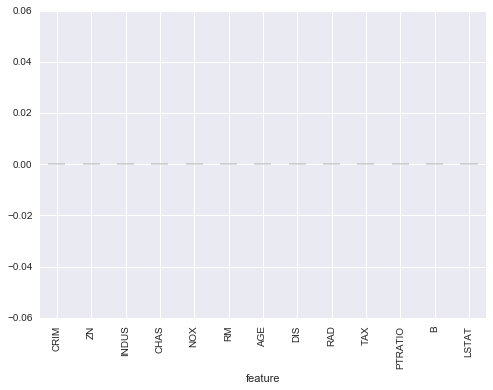

In [126]:
class constant_clf:
    def fit(self, x, y):
        self.coef_ = np.zeros_like(y)
    def predict(self, x):
        return np.zeros(x.shape[0])
    
clf = constant_clf()
eval_demo(clf, train, test)

### Ordinary Least Squares

coef: feature
CRIM      -0.468316
ZN         0.661420
INDUS     -0.193053
CHAS       0.590362
NOX       -2.007151
RM         2.677060
AGE        0.089818
DIS       -2.800253
RAD        3.088277
TAX       -2.544664
PTRATIO   -1.753668
B          1.239125
LSTAT     -3.313517
dtype: float64

MSE: 21.99056478805853
R^2 score: 0.7622409219525781


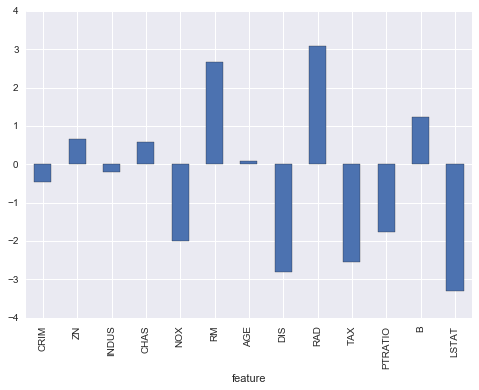

In [127]:
clf = linear_model.LinearRegression()
eval_demo(clf, train, test)

### Ridge Regression

coef: feature
CRIM      -0.335484
ZN         0.406023
INDUS     -0.385048
CHAS       0.638500
NOX       -1.660507
RM         2.756017
AGE       -0.019237
DIS       -2.342262
RAD        1.917049
TAX       -1.516435
PTRATIO   -1.628095
B          1.211168
LSTAT     -3.115336
dtype: float64

MSE: 22.54159982372627
R^2 score: 0.7562832040260546


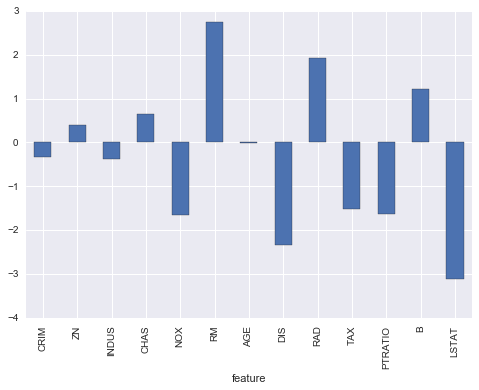

In [128]:
clf = linear_model.RidgeCV()
eval_demo(clf, train, test)

### Lasso

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.363068
ZN         0.515660
INDUS     -0.193249
CHAS       0.588243
NOX       -1.878529
RM         2.737828
AGE        0.000000
DIS       -2.606346
RAD        2.591293
TAX       -2.136520
PTRATIO   -1.712821
B          1.230864
LSTAT     -3.266427
dtype: float64

MSE: 22.150424725910256
R^2 score: 0.760512537447375


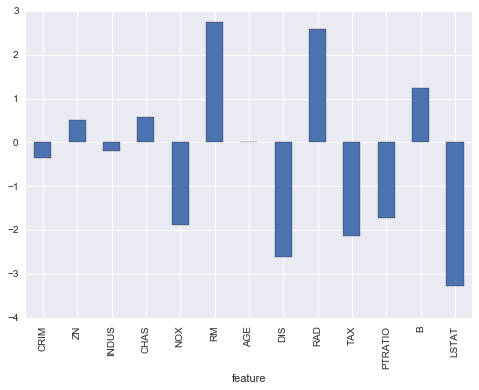

In [129]:
clf = linear_model.LassoCV()
eval_demo(clf, train, test)

### Elastic Net

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.285907
ZN         0.358103
INDUS     -0.330427
CHAS       0.617220
NOX       -1.661077
RM         2.775495
AGE       -0.000000
DIS       -2.278524
RAD        1.835862
TAX       -1.466651
PTRATIO   -1.630115
B          1.206482
LSTAT     -3.156105
dtype: float64

MSE: 22.623262362996094
R^2 score: 0.7554002794520416


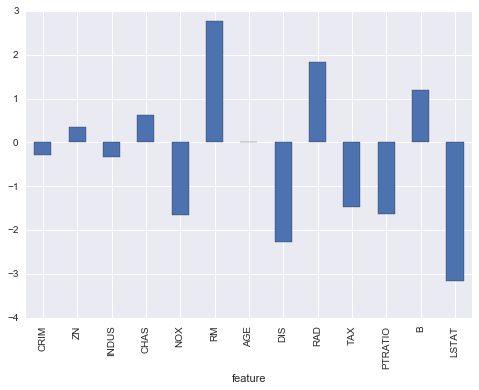

In [130]:
clf = linear_model.ElasticNetCV()
eval_demo(clf, train, test)

### Multi-task Lasso

### Least Angle Regression

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.226673
ZN         0.009145
INDUS     -0.688448
CHAS       0.674451
NOX       -2.014899
RM         2.899828
AGE        0.000000
DIS       -2.349972
RAD        0.133358
TAX        0.817237
PTRATIO   -1.778070
B          1.261697
LSTAT     -3.212717
dtype: float64

MSE: 23.519622758328225
R^2 score: 0.7457089494090716


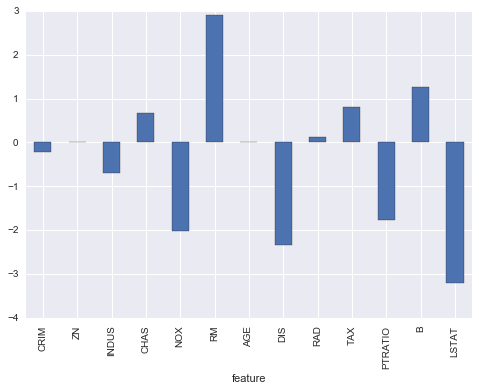

In [131]:
clf = linear_model.LarsCV()
eval_demo(clf, train, test)

### LARS Lasso 

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.468316
ZN         0.661420
INDUS     -0.193053
CHAS       0.590362
NOX       -2.007151
RM         2.677060
AGE        0.089818
DIS       -2.800253
RAD        3.088277
TAX       -2.544664
PTRATIO   -1.753668
B          1.239125
LSTAT     -3.313517
dtype: float64

MSE: 21.990564788058485
R^2 score: 0.7622409219525785


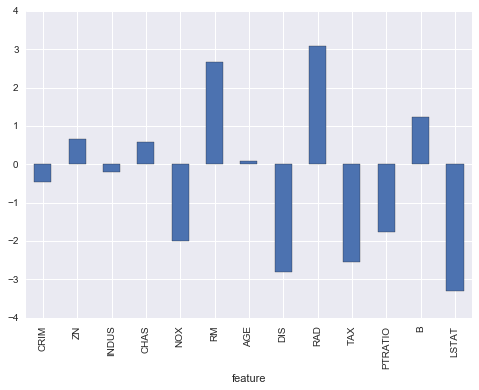

In [132]:
clf = linear_model.LassoLarsCV()
eval_demo(clf, train, test)

### Orthogonal Matching Pursuit

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         3.210682
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO   -1.428198
B          1.329840
LSTAT     -3.233193
dtype: float64

MSE: 26.883354081575266
R^2 score: 0.7093407312244826


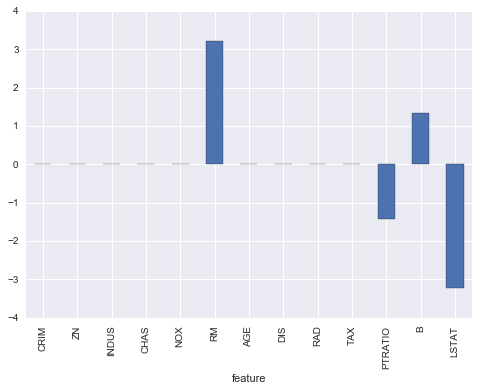

In [133]:
clf = linear_model.OrthogonalMatchingPursuitCV()
eval_demo(clf, train, test)

### Bayesian Regression

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.357921
ZN         0.452627
INDUS     -0.354219
CHAS       0.630307
NOX       -1.738188
RM         2.746674
AGE        0.000992
DIS       -2.445730
RAD        2.124127
TAX       -1.686886
PTRATIO   -1.656488
B          1.220348
LSTAT     -3.159082
dtype: float64

MSE: 22.36401156140355
R^2 score: 0.7582032648307149


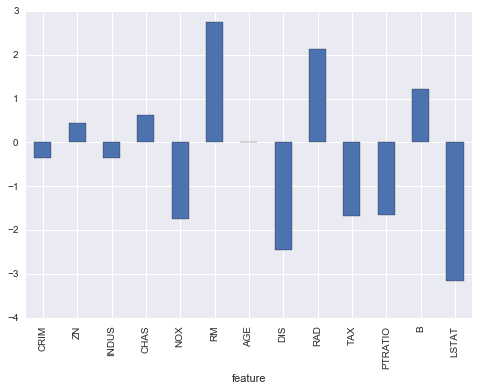

In [134]:
clf = linear_model.BayesianRidge()
eval_demo(clf, train, test)

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.002067
ZN         0.065479
INDUS     -0.001040
CHAS       0.468770
NOX       -1.830448
RM         2.867470
AGE       -0.000169
DIS       -2.132391
RAD        2.148589
TAX       -1.864310
PTRATIO   -1.799769
B          1.264396
LSTAT     -3.315897
dtype: float64

MSE: 23.201372791097036
R^2 score: 0.7491498259634837


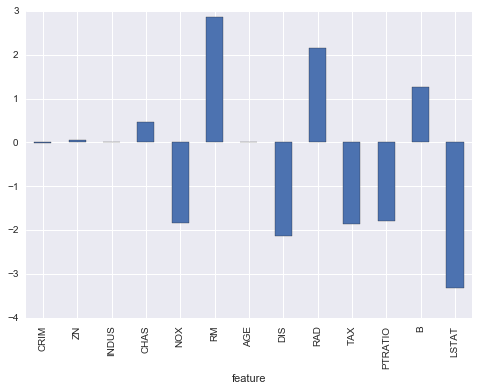

In [135]:
clf = linear_model.ARDRegression()
eval_demo(clf, train, test)

### Logistic Regression

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.262339
ZN         0.039608
INDUS     -0.702201
CHAS       0.724680
NOX       -0.882917
RM         2.940992
AGE        0.022054
DIS       -1.297749
RAD        0.599604
TAX       -0.522744
PTRATIO   -1.393586
B          1.065329
LSTAT     -2.956931
dtype: float64

MSE: 26.51291377110522
R^2 score: 0.713345882867372


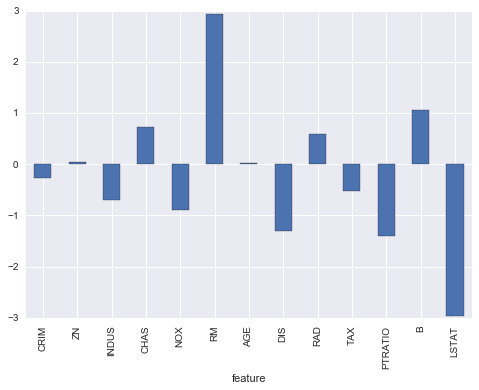

In [136]:
clf = linear_model.SGDRegressor()
eval_demo(clf, train, test)

### Stochastic Gradient Descent - SGD
### Perceptron
### Passive Aggressive Algorithms

### Robustness regression

In [153]:
clf = linear_model.RANSACRegressor()
eval_demo(clf, train, test)


MSE: 38.610109080952114
R^2 score: 0.5825526071352882


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.211186
ZN         0.001934
INDUS     -0.540448
CHAS      -2.120185
NOX       -0.613412
RM         3.789485
AGE       -1.271313
DIS       -2.084119
RAD        1.537781
TAX       -1.595111
PTRATIO   -1.208822
B          0.872062
LSTAT     -1.778311
dtype: float64

MSE: 38.477053122848275
R^2 score: 0.5839911905565136


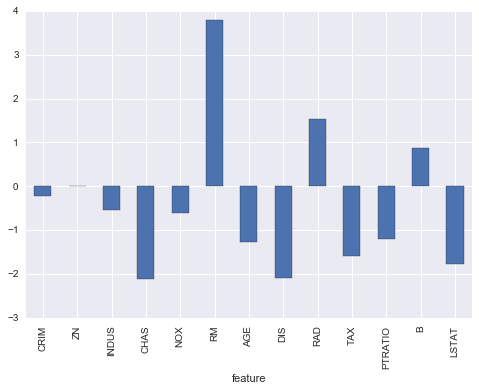

In [152]:
clf = linear_model.TheilSenRegressor()
eval_demo(clf, train, test)

Kernel ridge regression
=======================

In [14]:
from sklearn import kernel_ridge
clf = kernel_ridge.KernelRidge(alpha=1.0)
eval_demo(clf, train, test)


MSE: 511.9769611578043
R^2 score: -4.5354271906877734


SVR
====

In [1]:
from sklearn import svm

In [13]:
eval_demo(svm.SVR(), train, test)


MSE: 42.733259579183404
R^2 score: 0.5379736492704779


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.219808
ZN         0.529529
INDUS      0.262732
CHAS       0.355993
NOX       -1.103699
RM         3.108838
AGE       -0.451398
DIS       -1.517017
RAD        1.524162
TAX       -2.005084
PTRATIO   -1.406828
B          1.356819
LSTAT     -2.174650
dtype: float64

MSE: 26.776533988114334
R^2 score: 0.7104956559471074


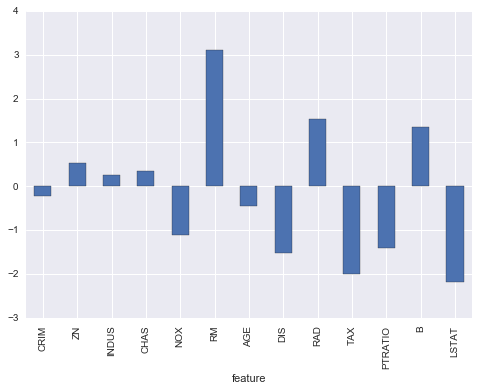

In [14]:
eval_demo(svm.LinearSVR(), train, test)

### Stochastic Gradient Descent

In [10]:
from sklearn import linear_model

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coef: feature
CRIM      -0.263604
ZN        -0.013236
INDUS     -0.490983
CHAS       0.764027
NOX       -0.867649
RM         3.048578
AGE       -0.128433
DIS       -1.245780
RAD        0.555358
TAX       -0.469744
PTRATIO   -1.361691
B          1.091979
LSTAT     -2.836422
dtype: float64

MSE: 26.88906290157823
R^2 score: 0.709279008217651


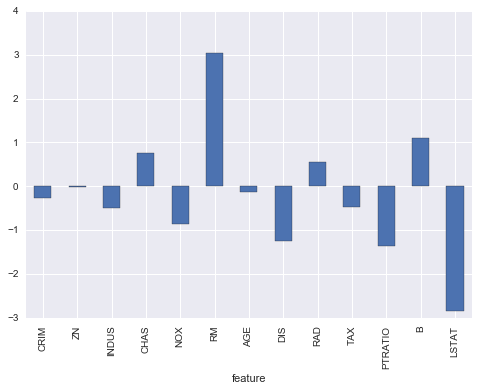

In [11]:
eval_demo(linear_model.SGDRegressor(), train, test)

### Nearest Neighbors

In [9]:
from sklearn import neighbors

In [10]:
eval_demo(neighbors.KNeighborsRegressor(), train, test)


MSE: 24.411916205533597
R^2 score: 0.7360615906713592


### Gaussian Processes

In [11]:
from sklearn import gaussian_process

In [13]:
eval_demo(gaussian_process.GaussianProcess(), train, test)


MSE: 35.53265211054293
R^2 score: 0.6158256648792362


### Cross decomposition

In [9]:
from sklearn import cross_decomposition

coef: feature
CRIM      -0.452227
ZN        -0.035380
INDUS     -0.484773
CHAS       1.314063
NOX       -0.264185
RM         3.214004
AGE       -0.072773
DIS       -0.849013
RAD        0.083258
TAX       -0.482004
PTRATIO   -1.432184
B          0.791911
LSTAT     -2.576482
dtype: float64

MSE: 24.798925165130726
R^2 score: 0.731877300985454


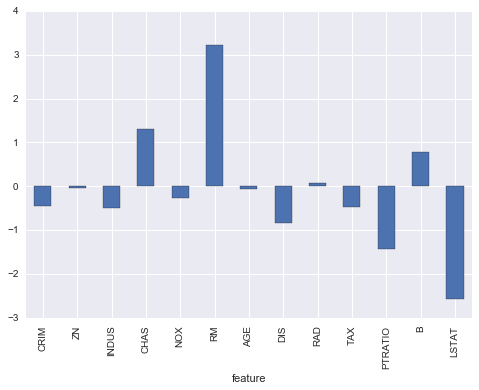

In [30]:
eval_demo(cross_decomposition.PLSRegression(), train, test)

/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/cross_decomposition/pls_.py:288: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


coef: feature
CRIM      -0.567169
ZN         0.801034
INDUS     -0.233803
CHAS       0.714977
NOX       -2.430825
RM         3.242139
AGE        0.108777
DIS       -3.391336
RAD        3.740156
TAX       -3.081797
PTRATIO   -2.123835
B          1.500682
LSTAT     -4.012941
dtype: float64

MSE: 22.79106351294374
R^2 score: 0.7535860356119509


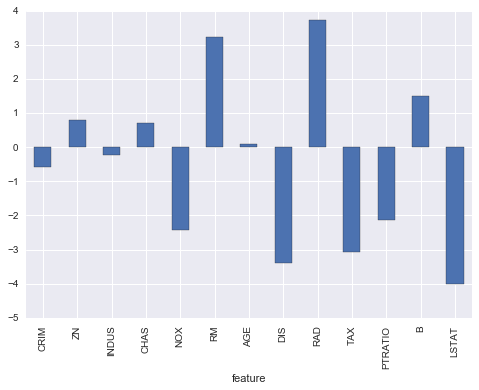

In [31]:
eval_demo(cross_decomposition.CCA(), train, test)

### Decision Tree

In [9]:
from sklearn import tree

In [10]:
eval_demo(tree.DecisionTreeRegressor(), train, test)


MSE: 21.78391304347826
R^2 score: 0.7644752132835118
